In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
style_datasets_path = [
            "data/simulated_dataset/causal_shift/0.00.h5", 
            "data/simulated_dataset/causal_shift/0.10.h5", 
            "data/simulated_dataset/causal_shift/0.20.h5", 
            "data/simulated_dataset/causal_shift/0.30.h5", 
            "data/simulated_dataset/causal_shift/0.40.h5", 
            "data/simulated_dataset/causal_shift/0.50.h5", 
            "data/simulated_dataset/causal_shift/0.60.h5", 
            "data/simulated_dataset/causal_shift/0.70.h5", 
            "data/simulated_dataset/causal_shift/0.80.h5", 
            "data/simulated_dataset/causal_shift/0.90.h5",
            
            "data/simulated_dataset/output_noise/0.25.h5",
            "data/simulated_dataset/output_noise/0.50.h5",
            "data/simulated_dataset/output_noise/0.75.h5",
            "data/simulated_dataset/output_noise/1.00.h5",
            "data/simulated_dataset/output_noise/1.25.h5",
            "data/simulated_dataset/output_noise/1.50.h5",
            "data/simulated_dataset/output_noise/1.75.h5",
            "data/simulated_dataset/output_noise/2.00.h5",
            "data/simulated_dataset/output_noise/2.25.h5",
            "data/simulated_dataset/output_noise/2.50.h5",
            
            "data/simulated_dataset/input_noise/0.25.h5",
            "data/simulated_dataset/input_noise/0.50.h5",
            "data/simulated_dataset/input_noise/0.75.h5",
            "data/simulated_dataset/input_noise/1.00.h5",
            "data/simulated_dataset/input_noise/1.25.h5",
            "data/simulated_dataset/input_noise/1.50.h5",
            "data/simulated_dataset/input_noise/1.75.h5",
            "data/simulated_dataset/input_noise/2.00.h5",
            "data/simulated_dataset/input_noise/2.25.h5",
            "data/simulated_dataset/input_noise/2.50.h5",
        
            "data/simulated_dataset/time_shift/0.h5",
            "data/simulated_dataset/time_shift/2.h5",
            "data/simulated_dataset/time_shift/4.h5",
            "data/simulated_dataset/time_shift/6.h5",
            "data/simulated_dataset/time_shift/8.h5",
            "data/simulated_dataset/time_shift/10.h5",
            "data/simulated_dataset/time_shift/12.h5",
            "data/simulated_dataset/time_shift/14.h5",
            "data/simulated_dataset/time_shift/16.h5",
            "data/simulated_dataset/time_shift/18.h5"
            ]

content_path = [
    "data/simulated_dataset/01 - Source Domain.h5"
]

In [4]:
def remove_format(path:str):
    return ".".join(path.split('.')[:-1])

def make_train_valid_split_synthetic(dataset:pd.DataFrame, train_split:float=0.8):
    # Pour les labels dans les parametres. 
    # Mettre une partie dans Validation set
    # et le retirer du trainset.
    
    shape = dataset.shape
    train_end = int(shape[0]*train_split)
        
    train_dataset = dataset[:train_end]
    valid_dataset = dataset[train_end:]
    
    return train_dataset, valid_dataset

In [5]:
def get_scaler(dsets:list):
    dsets = [pd.read_hdf(d) for d in dsets]
    dsets = pd.concat(dsets)
        
    scaler = StandardScaler()
    scaler.fit(dsets.values)
    return scaler


def scale_dataset(df:pd.DataFrame, scaler:StandardScaler):
    _data = df.values
    scaled_data = scaler.transform(_data)
    _df =  pd.DataFrame(scaled_data, df.index, df.columns)
    # replacing labels by the unscaled labels.
    _df["labels"] = df['labels']
    return _df


def make_train_valid(path, scaler:StandardScaler=None):
    name_placeholder = remove_format(path)
    scaler_placeholder = ""
    
    dset = pd.read_hdf(path)
    if not scaler == None:
        dset = scale_dataset(dset, scaler)
        scaler_placeholder = 'standardized_'
        
    
    dset_train, dset_valid = make_train_valid_split_synthetic(dset)
    
    dset_train.to_hdf(f"{name_placeholder}_{scaler_placeholder}train.h5", key="data")
    dset_valid.to_hdf(f"{name_placeholder}_{scaler_placeholder}valid.h5", key="data")

## Make Unscaled Sequences.

In [6]:
make_train_valid(content_path[0])

In [7]:
for path in style_datasets_path:
    make_train_valid(path)

## Make Scaled Sequeces
### Amplitude Dataset. 

In [8]:
scaler = get_scaler(style_datasets_path)

make_train_valid(content_path[0], scaler=scaler)

for path in style_datasets_path:
    make_train_valid(path, scaler=scaler)

In [9]:
pd.read_hdf("data/simulated_dataset/01 - Source Domain_train.h5").head()

,in_c1,in_c2,out_c1,out_c2,out_c3,out_c4,material velocity,labels
0,10.179714,9.710135,3.198051,3.050529,0.000000,0.000000,0.100000,2.0
1,11.272970,11.490841,4.856405,5.440206,1.175399,0.587700,0.100942,2.0
2,12.210423,13.166582,5.836549,7.400293,2.740883,1.370442,0.101884,2.0
3,12.801668,13.852572,6.431431,8.785072,4.357853,2.178926,0.102823,2.0
4,14.019109,14.839034,7.076567,9.926062,5.820998,2.910499,0.103760,2.0


In [11]:
pd.read_hdf("data/simulated_dataset/01 - Source Domain_standardized_train.h5").head()

,in_c1,in_c2,out_c1,out_c2,out_c3,out_c4,material velocity,labels
0,0.049471,-0.079939,3.554785e-18,-1.541110,-3.698451e-18,-3.698451e-18,5.734284e-07,2.0
1,0.351002,0.411205,3.554785e-18,-0.704785,-3.698451e-18,-3.698451e-18,4.442205e-02,2.0
2,0.609561,0.873397,3.554785e-18,-0.018804,-3.698451e-18,-3.698451e-18,8.879969e-02,2.0
3,0.772633,1.062603,3.554785e-18,0.465832,-3.698451e-18,-3.698451e-18,1.330897e-01,2.0
4,1.108416,1.334683,3.554785e-18,0.865149,-3.698451e-18,-3.698451e-18,1.772484e-01,2.0


<Axes: >

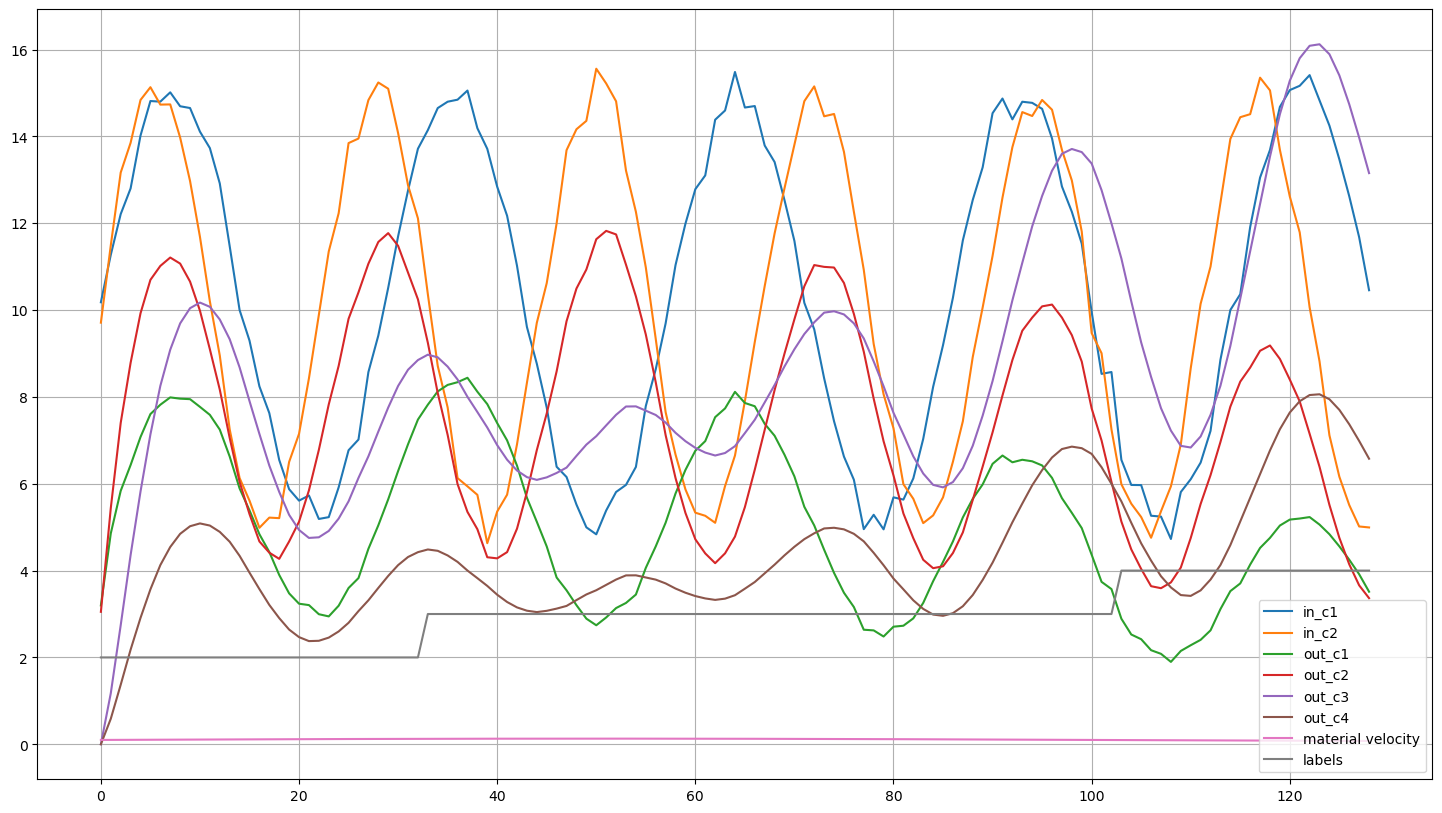

In [13]:
df = pd.read_hdf("data/simulated_dataset/01 - Source Domain_train.h5")

df.loc[:128].plot(figsize=(18, 10), grid=True)


<Axes: >

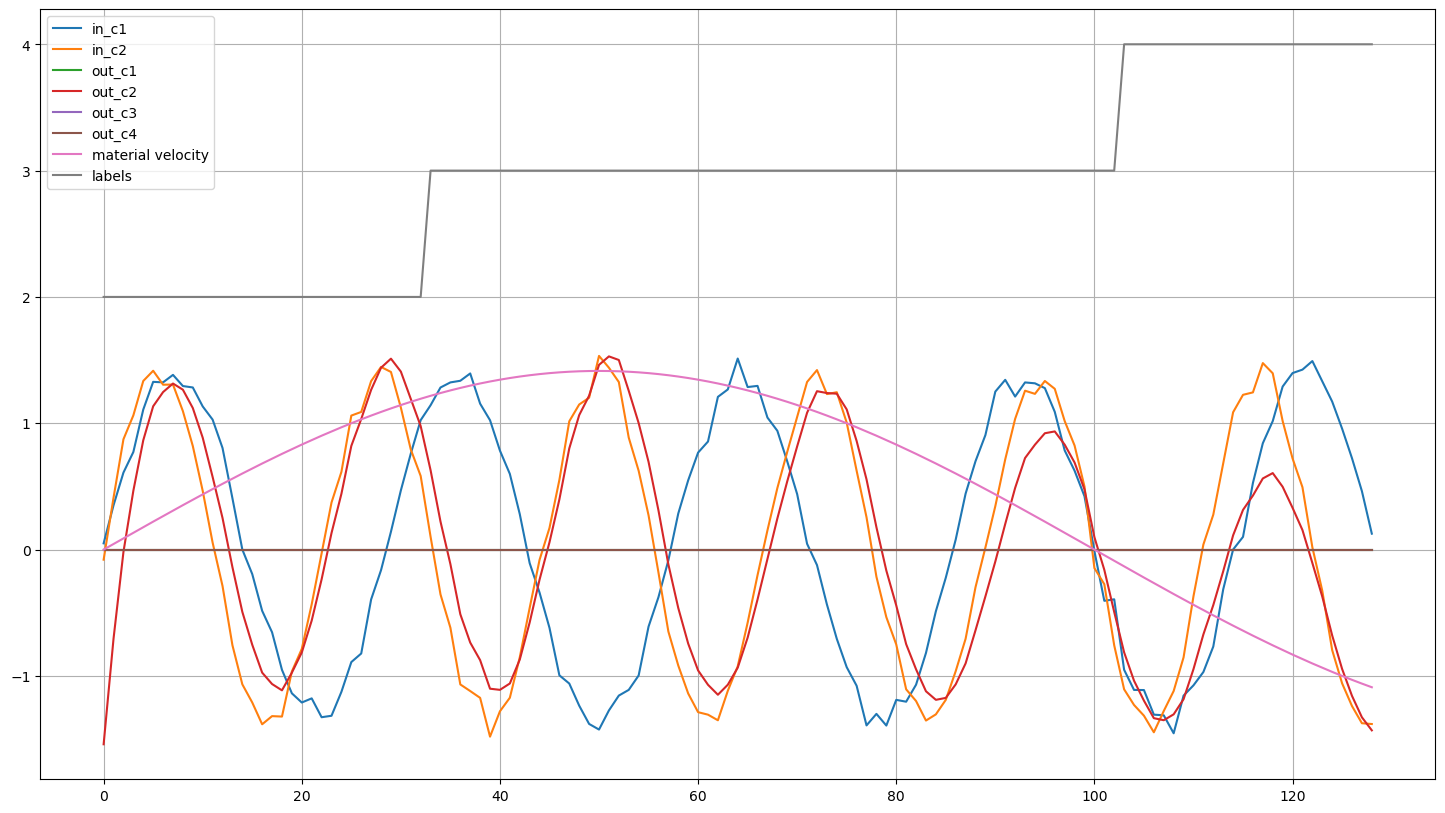

In [14]:
df = pd.read_hdf("data/simulated_dataset/01 - Source Domain_standardized_train.h5")

df.loc[:128].plot(figsize=(18, 10), grid=True)